# 1. Generating long correlation matrix of netts files

In [7]:
import os
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr

# Mapping of numbers to abbreviations
number_to_abbreviation = {
    3: "CL_ACC", 11: "CL_MCC", 17: "CL_med_OFC", 25: "CL_lat_OFC", 37: "CL_caudal_OFC",
    51: "CL_area_8A", 54: "CL_dlPFC", 64: "CL_vlPFC", 78: "CL_M1/PM", 87: "CL_SMA/preSMA",
    92: "CL_SI", 95: "CL_SII", 97: "CL_V6/V6A", 102: "CL_area_5", 107: "CL_vm_IPS",
    113: "CL_lat_IPS", 119: "CL_MST", 120: "CL_area_7_in_IPL", 126: "CL_area_7m", 
    127: "CL_PCgG", 148: "CL_paraHipp", 153: "CL_Rh", 165: "CL_TG", 176: "CL_TEO",
    177: "CL_TE", 188: "CL_STSf", 194: "CL_STGr/STSd", 199: "CL_STGc", 205: "CL_belt",
    218: "CL_RTp", 219: "CL_core", 224: "CL_floor_of_ls", 232: "CL_MT", 234: "CL_V4",
    237: "CL_V2-V3", 246: "CL_V1", 503: "CR_ACC", 511: "CR_MCC", 517: "CR_med_OFC",
    525: "CR_lat_OFC", 537: "CR_caudal_OFC", 551: "CR_area_8A", 554: "CR_dlPFC",
    564: "CR_vlPFC", 578: "CR_M1/PM", 587: "CR_SMA/preSMA", 592: "CR_SI", 595: "CR_SII",
    597: "CR_V6/V6A", 602: "CR_area_5", 607: "CR_vm_IPS", 613: "CR_lat_IPS", 619: "CR_MST",
    620: "CR_area_7_in_IPL", 626: "CR_area_7m", 627: "CR_PCgG", 648: "CR_paraHipp",
    653: "CR_Rh", 665: "CR_TG", 676: "CR_TEO", 677: "CR_TE", 688: "CR_STSf", 
    694: "CR_STGr/STSd", 699: "CR_STGc", 705: "CR_belt", 718: "CR_RTp", 719: "CR_core",
    724: "CR_floor_of_ls", 732: "CR_MT", 734: "CR_V4", 737: "CR_V2-V3", 746: "CR_V1", 1652: "SR_APul", 
    1653: "SR_MPul", 1654: "SR_LPul", 1655: "SR_IPul", 1152: "SL_APul", 1153: "SL_MPul", 1154: "SL_LPul", 1155: "SL_IPul"
}

# Function to load .netts files from a folder
def load_netts_files(folder_path):
    data_dict = {}
    
    for file in sorted(os.listdir(folder_path)):  # Sort files alphabetically
        if file.endswith(".netts"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path, sep='\s+', header=None)
            variable_name = file.replace('.netts', '')  # Use filename as variable name
            data_dict[variable_name] = df.T  
    
    return data_dict

# Function to compute the correlation matrix for all loaded files
def calculate_correlation_matrix(data_dict):
    merged_df = pd.concat(data_dict.values(), axis=1, keys=data_dict.keys(), join='outer')
    merged_df = merged_df.interpolate(method='linear')  
    correlation_matrix = merged_df.corr()  # Compute correlation matrix
    return correlation_matrix

# Function to convert the correlation matrix to long format
def convert_to_long_format(correlation_matrix):
    long_format_data = []
    for row in correlation_matrix.index:
        for col in correlation_matrix.columns:
            row_name = row[0] if isinstance(row, tuple) else row
            col_name = col[0] if isinstance(col, tuple) else col
            
            row_number = int(re.search(r'\d+', row_name).group()) 
            col_number = int(re.search(r'\d+', col_name).group())  
            
            # If the number exists in the mapping, replace with abbreviation
            row_abbreviation = number_to_abbreviation.get(row_number, row_name)  # Use name if not found
            col_abbreviation = number_to_abbreviation.get(col_number, col_name)  # Use name if not found

            # Add the row to the long format table
            long_format_data.append({
                'Variable1': row_abbreviation,
                'Variable2': col_abbreviation,
                'Correlation': correlation_matrix.loc[row, col]
            })

    long_format_df = pd.DataFrame(long_format_data)
    return long_format_df

# Save the long correlation matrix as a CSV file
def save_long_correlation_matrix(long_df, output_file):
    long_df.to_csv(output_file, index=False)
    print(f"The long correlation matrix has been saved to {output_file}.")

# Main process to load data, compute the correlation matrix, and save the results
def process_netts_folder(folder_path, output_file):
    data_dict = load_netts_files(folder_path)  # Loads all .netts files
    correlation_matrix = calculate_correlation_matrix(data_dict)  # Computes the correlation matrix
    long_df = convert_to_long_format(correlation_matrix)  # Converts to long format
    save_long_correlation_matrix(long_df, output_file)  # Saves the CSV file

folder_path = "netts/Norman/predrug_002_with_Pul" 
output_file = "netts/csv_files/long_correlation_matrix_Norman_predrug_002.csv"  

# Run the main process
process_netts_folder(folder_path, output_file)


The long correlation matrix has been saved to netts/csv_files/long_correlation_matrix_Norman_predrug_002.csv.


# Generate mean long matrix of long correlation matrices

In [8]:
import os
import pandas as pd
import numpy as np
import re

# List of CSV files
csv_files = [
    'netts/csv_files/long_correlation_matrix_Linus_predrug_002.csv',
    'netts/csv_files/long_correlation_matrix_Curius_predrug_002.csv', 
    'netts/csv_files/long_correlation_matrix_Linus1015_predrug_002.csv', 
    'netts/csv_files/long_correlation_matrix_Pinocchio_predrug_002.csv',
    'netts/csv_files/long_correlation_matrix_Rio_predrug_002.csv',
    'netts/csv_files/long_correlation_matrix_Norman_predrug_002.csv'
]

dfs = []

# Read the CSV files and print their lengths and first few rows
for file in csv_files:
    if file:  # Ensure the path is not empty
        df = pd.read_csv(file)
        #print(f"File: {file}")
       # print(f"Number of rows: {len(df)}")
        #print("First 5 rows:")
        #print(df.head(), "\n")
        dfs.append(df)

# Check whether the values in columns 1 and 2 match row-wise across all files
for i in range(len(dfs[0])):
    for df in dfs[1:]:
        if not (df.iloc[i, 0] == dfs[0].iloc[i, 0] and df.iloc[i, 1] == dfs[0].iloc[i, 1]):
            raise ValueError(f"Mismatched values in row {i+1} for Variable1 or Variable2!")

# Average the 'Correlation' column across all DataFrames
correlation_averaged = np.mean([df['Correlation'] for df in dfs], axis=0)

# Create the result DataFrame
result_df = dfs[0][['Variable1', 'Variable2']].copy()
result_df['Correlation_Avg'] = correlation_averaged

# Save the results
output_file = 'average_long_correlation_matrix.csv'
result_df.to_csv(output_file, index=False)
#print(f"Averaged correlation table saved to: {output_file}")


ValueError: Mismatched values in row 28 for Variable1 or Variable2!

# Generate mean correlation matrix with standarddeviation of individual primates

In [9]:
import os
import pandas as pd
import numpy as np

# List of CSV files
csv_files = [
    'netts/csv_files/long_correlation_matrix_Linus_predrug_002.csv',
    'netts/csv_files/long_correlation_matrix_Curius_predrug_002.csv', 
    'netts/csv_files/long_correlation_matrix_Linus1015_predrug_002.csv', 
    'netts/csv_files/long_correlation_matrix_Pinocchio_predrug_002.csv',
    'netts/csv_files/long_correlation_matrix_Rio_predrug_002.csv',
    'netts/csv_files/long_correlation_matrix_Norman_predrug_002.csv'
]

# List to store the DataFrames
dfs = []

# Read the CSV files and display their lengths and first rows
for file in csv_files:
    if file:  # Ensure the path is not empty
        df = pd.read_csv(file)
        #print(f"File: {file}")
        #print(f"Number of rows: {len(df)}")
        #print("First 5 rows:")
        #print(df.head(), "\n")
        dfs.append(df)

# Check whether values in columns 1 and 2 are identical row by row across all files
for i in range(len(dfs[0])):
    for df in dfs[1:]:
        if not (df.iloc[i, 0] == dfs[0].iloc[i, 0] and df.iloc[i, 1] == dfs[0].iloc[i, 1]):
            raise ValueError(f"Mismatched values in row {i+1} for Variable1 or Variable2!")

# Calculate the average correlation
correlation_averaged = np.mean([df['Correlation'] for df in dfs], axis=0)

# Calculate the standard deviation of the correlations
correlation_std_dev = np.std([df['Correlation'] for df in dfs], axis=0, ddof=1)

# Create the result DataFrame
result_df = dfs[0][['Variable1', 'Variable2']].copy()
result_df['Correlation_Avg'] = correlation_averaged
result_df['Correlation_StdDev'] = correlation_std_dev

# Save the results
output_file = 'average_long_correlation_matrix_with_std_and_pul.csv'
result_df.to_csv(output_file, index=False)
#print(f"Averaged correlation table with standard deviation saved to: {output_file}")


ValueError: Mismatched values in row 28 for Variable1 or Variable2!

## Verification of long matrices

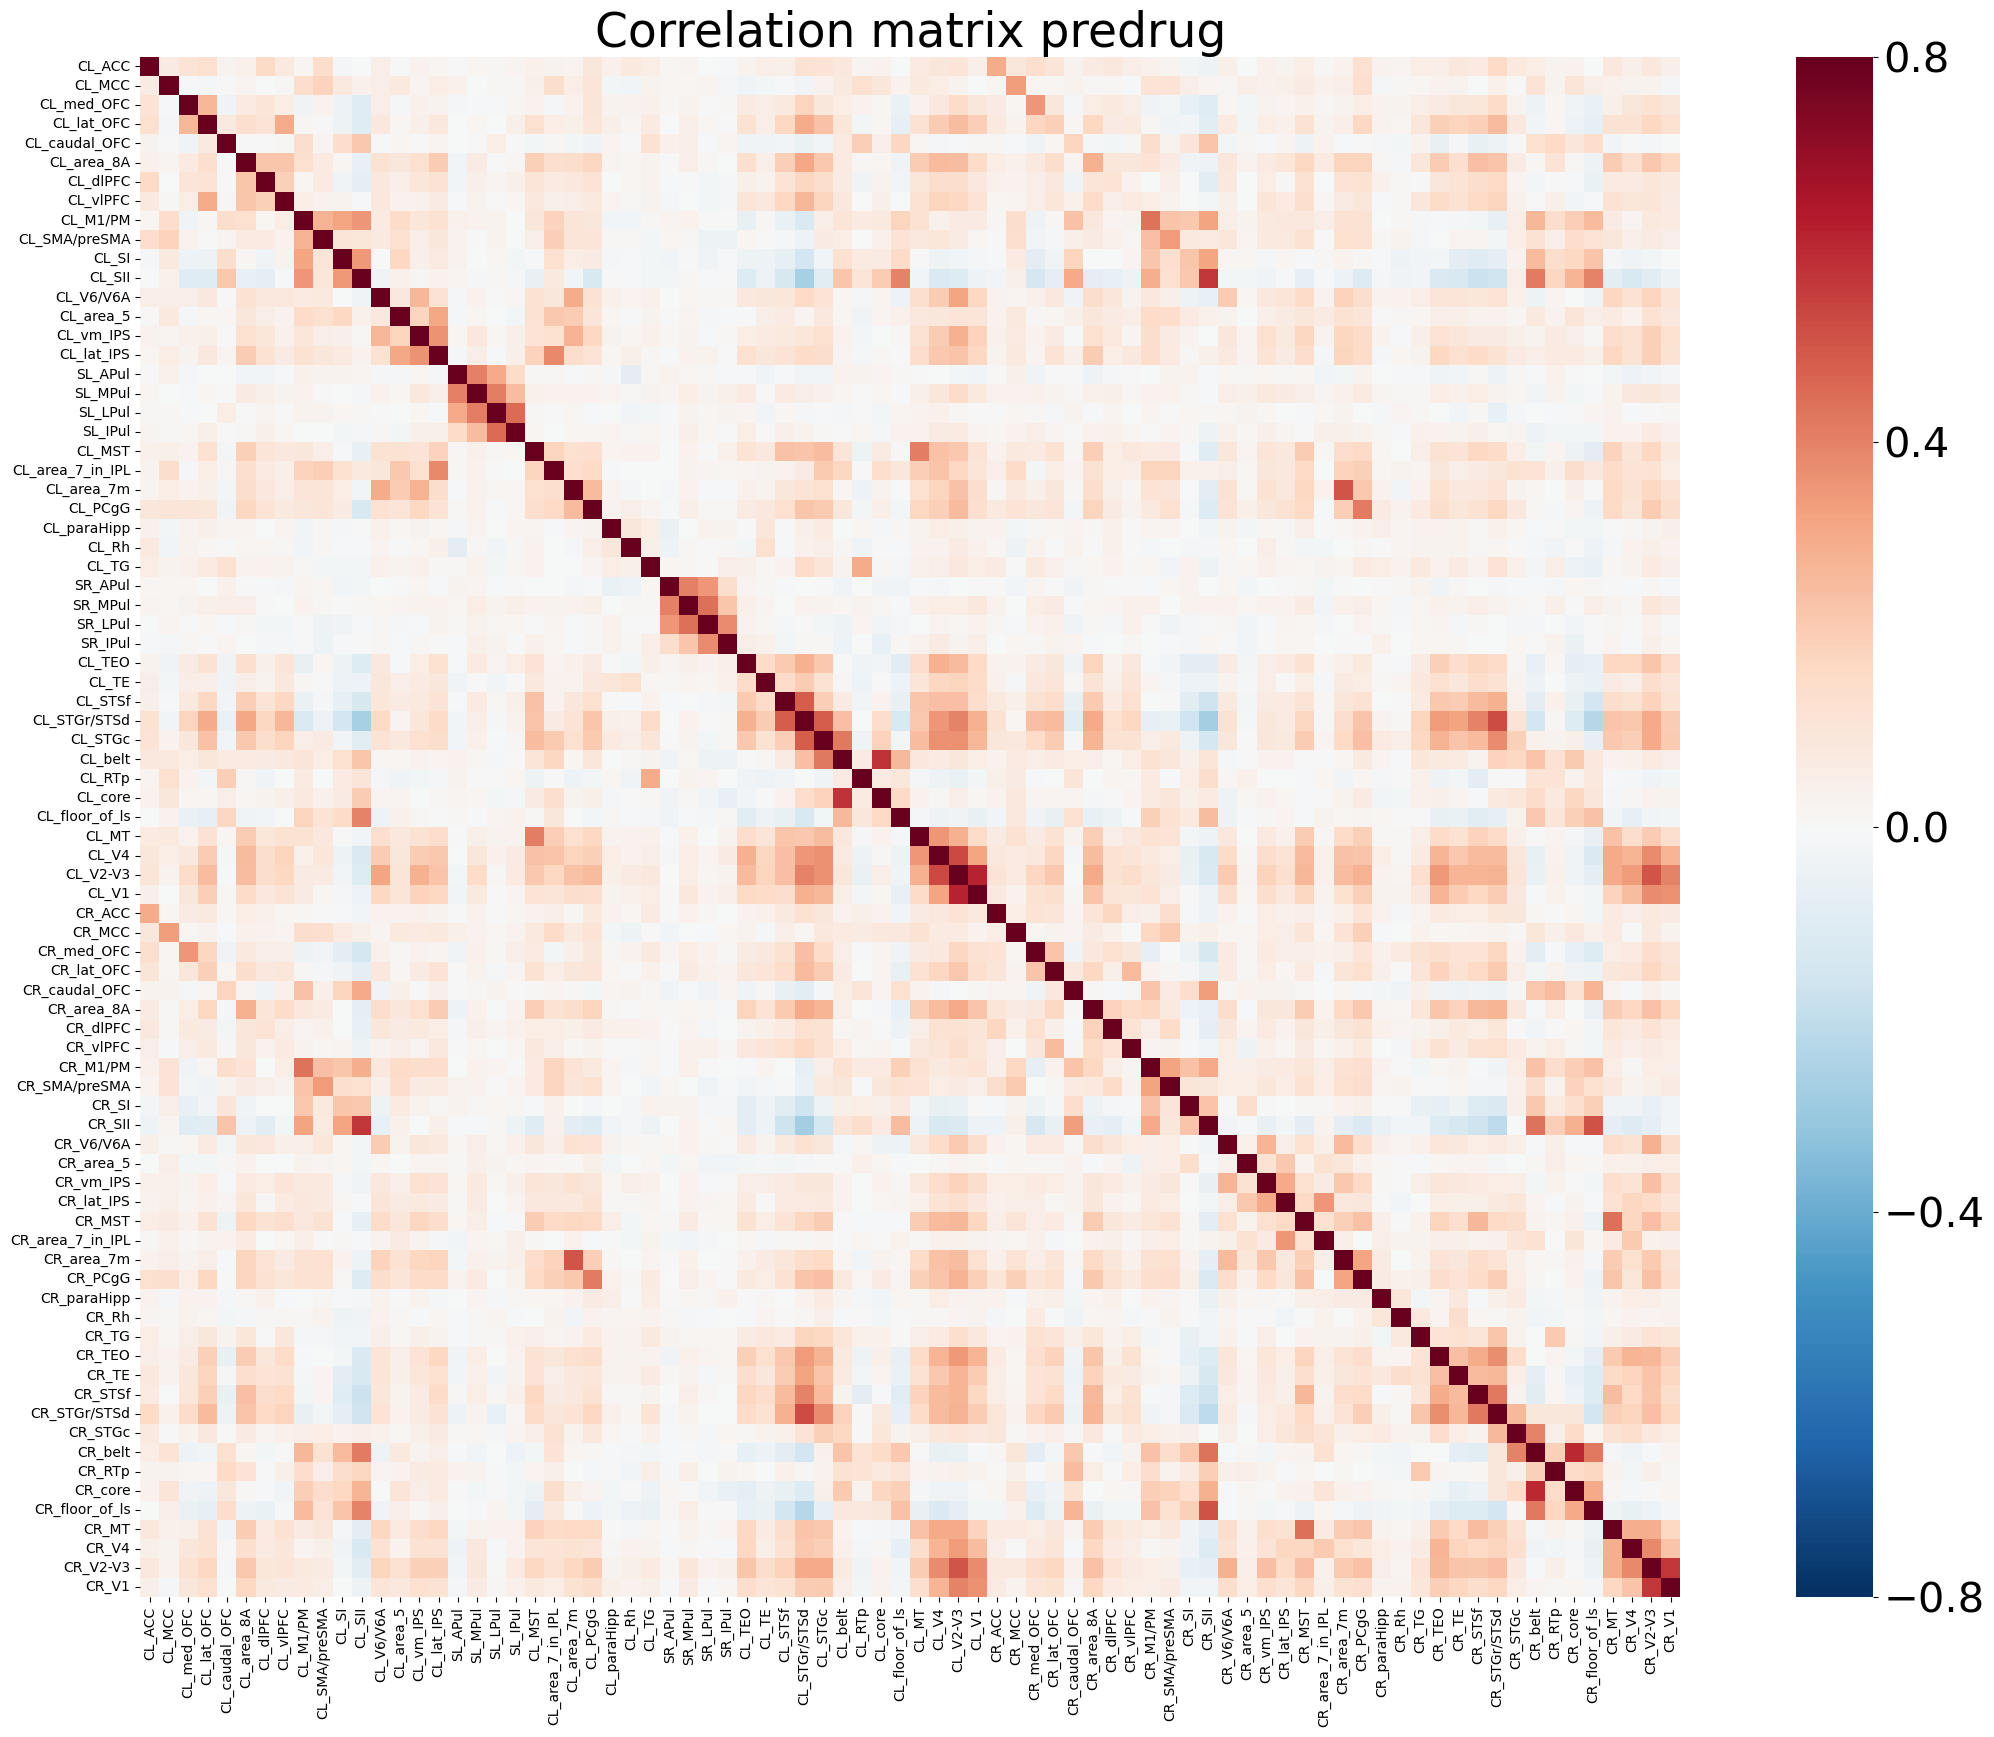

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
df = pd.read_csv("netts/csv_files/long_correlation_matrix_Curius_predrug_002.csv")

# Step 2: Ensure the order of variables is preserved
variables = pd.concat([df['Variable1'], df['Variable2']]).unique()

# Step 3: Create an empty matrix (index and columns from variables)
corr_matrix = pd.DataFrame(np.nan, index=variables, columns=variables)

# Step 4: Fill the matrix with correlation values
for _, row in df.iterrows():
    corr_matrix.loc[row['Variable1'], row['Variable2']] = row['Correlation']
    corr_matrix.loc[row['Variable2'], row['Variable1']] = row['Correlation']  # Symmetric values

# Step 5: Visualize the matrix
plt.figure(figsize=(30, 20))
ax = sns.heatmap(
    corr_matrix, annot=False, cmap="RdBu_r", fmt=".2f", square=True, vmin=-0.8, vmax=0.8, 
    cbar_kws={"shrink": 1.0, "ticks": [-0.8, -0.4, 0, 0.4, 0.8]}
)

# Add title and display matrix
plt.title("Correlation matrix predrug", fontsize=34)

# Change font size and rotation for axis labels (variable names)
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=-45, ha="right")
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, rotation=-45)  # Y-axis remains horizontal

# Adjust font size of the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)  # Adjust font size of colorbar ticks

# Save and show
# plt.savefig("diagrams_new_1903/Correlation_matrix_pre_P.png")
#plt.show()


## Now plotting averaged matrix

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
df = pd.read_csv("average_long_correlation_matrix.csv")

# Step 2: Ensure the order of variables is preserved
variables = pd.concat([df['Variable1'], df['Variable2']]).unique()

# Step 3: Create an empty matrix (index and columns from variables)
corr_matrix = pd.DataFrame(np.nan, index=variables, columns=variables)

# Step 4: Fill the matrix with correlation values
for _, row in df.iterrows():
    corr_matrix.loc[row['Variable1'], row['Variable2']] = row['Correlation_Avg']
    corr_matrix.loc[row['Variable2'], row['Variable1']] = row['Correlation_Avg']  

# Step 5: Visualize the matrix
plt.figure(figsize=(30, 20))
ax = sns.heatmap(
    corr_matrix, annot=False, cmap="RdBu_r", fmt=".2f", square=True, vmin=-0.4, vmax=0.4, 
    cbar_kws={"shrink": 1.0, "ticks": [-0.8, -0.4, 0, 0.4, 0.8]}
)

# Add title and display the matrix
plt.title("Correlation matrix average", fontsize=50)

# Change font size and rotation for axis labels (variable names)
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=-45, ha="right")
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, rotation=-45)  # Y-axis remains horizontal

# Adjust font size of the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=40)  # Adjust font size of colorbar ticks

# Save and show
plt.tight_layout()
#plt.savefig("diagrams/Averaged_correlation_matrix_0605.png", dpi=300, bbox_inches='tight')
#plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'average_long_correlation_matrix.csv'

# left pul to cortex

In [5]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Function to create the plot with separate lines for each Variable1 and perform ANOVA
def create_plot_with_means_and_anova(input_file_path):
    # Read data from the CSV file
    with open(input_file_path, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row for row in reader]

    # Filter the data to keep only rows where Variable2 starts with 'C' and Variable1 is in the filter list
    filter_values = ['SL_APul', 'SL_MPul', 'SL_LPul', 'SL_IPul']
    filtered_data = [row for row in data if row['Variable2'].startswith('C') and row['Variable1'] in filter_values]

    # Prepare data for ANOVA test
    group_data = {key: [] for key in filter_values}

    for row in filtered_data:
        variable1 = row['Variable1']
        if variable1 in group_data:
            group_data[variable1].append(float(row['Correlation_Avg']))

    # Perform ANOVA test
    anova_result = stats.f_oneway(group_data['SL_APul'],
                                 group_data['SL_MPul'],
                                 group_data['SL_LPul'],
                                 group_data['SL_IPul'])

    print(f"ANOVA test results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

    if anova_result.pvalue < 0.05:
        print("There are significant differences between the groups.")
    else:
        print("There are no significant differences between the groups.")

    # Colors for the different lines
    colors = {
        'SL_APul': 'b',   
        'SL_MPul': 'g',   
        'SL_LPul': 'r',   
        'SL_IPul': 'c'    
    }

    # Legend labels for the lines
    legend_labels = {
        'SL_APul': 'SL_APul',
        'SL_MPul': 'SL_MPul',
        'SL_LPul': 'SL_LPul',
        'SL_IPul': 'SL_IPul'
    }

    # Create the plot
    plt.figure(figsize=(50, 20))

    # Loop to draw lines for each variable1
    for variable1 in filter_values:
        areas = []
        means = []

        for row in filtered_data:
            if row['Variable1'] == variable1:
                areas.append(row['Variable2'])
                means.append(float(row['Correlation_Avg']))

        plt.plot(areas, means, marker='o', linestyle='-', color=colors[variable1], label=legend_labels[variable1])

    # Add labels and title to the plot
    plt.title('Cortical correlation per pulvinar subdivision', fontsize=60)
    plt.xlabel('Cortical ROI', fontsize=45)
    plt.ylabel('Correlation coefficient', fontsize=45)
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=50)

    plt.grid(True)
    plt.legend(fontsize=50)

    # Show and save the plot
    plt.tight_layout()
    plt.savefig("cortico-pulvinar_correlations_left_0605.png", dpi=200)
    plt.show()

# Call the function with the path to the CSV file
create_plot_with_means_and_anova('average_long_correlation_matrix_with_std_and_pul.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'average_long_correlation_matrix_with_std_and_pul.csv'

In [17]:
import csv
import matplotlib.pyplot as plt

# Function to create a plot with means and standard deviations as error bars
def create_plot_with_means_and_std(input_file_path):
    # Read data from the CSV file
    with open(input_file_path, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row for row in reader]

    # Filter only certain values in Variable1 and Variable2 starting with 'C'
    filter_values = ['SL_APul', 'SL_MPul', 'SL_LPul', 'SL_IPul']
    filtered_data = [row for row in data if row['Variable2'].startswith('C') and row['Variable1'] in filter_values]

    # Colors for the different lines
    colors = {
        'SL_APul': 'b',  # Blue
        'SL_MPul': 'g',  # Green
        'SL_LPul': 'r',  # Red
        'SL_IPul': 'c'   # Cyan
    }

    # Legend labels
    legend_labels = {
        'SL_APul': 'SL_APul',
        'SL_MPul': 'SL_MPul',
        'SL_LPul': 'SL_LPul',
        'SL_IPul': 'SL_IPul'
    }

    # Create the plot
    plt.figure(figsize=(50, 20))

    for variable1 in filter_values:
        areas = []
        means = []
        std_devs = []

        for row in filtered_data:
            if row['Variable1'] == variable1:
                areas.append(row['Variable2'])
                means.append(float(row['Correlation_Avg']))
                std_devs.append(float(row['Correlation_StdDev']) * 0.4) 

        # Plot line with error bars
        plt.errorbar(areas, means, yerr=std_devs, fmt='-o', color=colors[variable1], label=legend_labels[variable1], capsize=1)

    # Plot labels and formatting
    plt.title('Cortical correlation per pulvinar subdivision', fontsize=60)
    plt.xlabel('Cortical ROI', fontsize=45)
    plt.ylabel('Correlation coefficient', fontsize=45)
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=50)
    plt.grid(True)
    plt.legend(fontsize=50)

    # Save and show the plot
    plt.tight_layout()
    plt.savefig("cortico-pulvinar_correlations_left_with_Stddev.png", dpi=200)
    #plt.show()

# Call the function with the path to your CSV file
create_plot_with_means_and_std('average_long_correlation_matrix_with_std_and_pul.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'average_long_correlation_matrix_with_std_and_pul.csv'

# right Pul to cortex

In [16]:
import csv
import matplotlib.pyplot as plt

# Function to create plot with means and standard deviations
def create_plot_with_means(input_file_path):
    # Read data from CSV
    with open(input_file_path, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row for row in reader]

    # Filter for specific Variable1 values and Variable2 starting with 'C'
    filter_values = ['SR_APul', 'SR_MPul', 'SR_LPul', 'SR_IPul']
    filtered_data = [row for row in data if row['Variable2'].startswith('C') and row['Variable1'] in filter_values]

    # Colors for each line
    colors = {
        'SR_APul': 'b',
        'SR_MPul': 'g',  
        'SR_LPul': 'r', 
        'SR_IPul': 'c'   
    }

    # Legend labels
    legend_labels = {
        'SR_APul': 'SR_APul',
        'SR_MPul': 'SR_MPul',
        'SR_LPul': 'SR_LPul',
        'SR_IPul': 'SR_IPul'
    }

    # Create the figure
    plt.figure(figsize=(50, 20))

    for variable1 in filter_values:
        areas = []
        means = []
        std_devs = []

        for row in filtered_data:
            if row['Variable1'] == variable1:
                areas.append(row['Variable2'])
                means.append(float(row['Correlation_Avg']))
                std_devs.append(float(row['Correlation_StdDev']) * 0.4) 

        # Plot with error bars
        plt.errorbar(areas, means, yerr=std_devs, fmt='-o', color=colors[variable1], label=legend_labels[variable1], capsize=1)

    # Labels and formatting
    plt.title('Cortical correlation per pulvinar subdivision', fontsize=60)
    plt.xlabel('Cortical ROI', fontsize=45)
    plt.ylabel('Correlation coefficient', fontsize=45)
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=50)
    plt.grid(True)
    plt.legend(fontsize=50)

    # Save and display
    plt.tight_layout()
    plt.savefig("cortico-pulvinar_correlations_right_WITH_STDDEV.png", dpi=200)
   # plt.show()

# Call function with CSV file path
create_plot_with_means('average_long_correlation_matrix_with_std_and_pul.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'average_long_correlation_matrix_with_std_and_pul.csv'

In [15]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Function to create plot with means and perform ANOVA test
def create_plot_with_means_and_anova(input_file_path):
    # Read data from CSV file
    with open(input_file_path, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row for row in reader]

    # Filter data: Variable2 starts with 'C', Variable1 in given list
    filter_values = ['SR_APul', 'SR_MPul', 'SR_LPul', 'SR_IPul']
    filtered_data = [row for row in data if row['Variable2'].startswith('C') and row['Variable1'] in filter_values]

    # Prepare data for ANOVA test
    group_data = {key: [] for key in filter_values}
    for row in filtered_data:
        variable1 = row['Variable1']
        if variable1 in group_data:
            group_data[variable1].append(float(row['Correlation_Avg']))

    anova_result = stats.f_oneway(group_data['SR_APul'],
                                 group_data['SR_MPul'],
                                 group_data['SR_LPul'],
                                 group_data['SR_IPul'])

    print(f"ANOVA test results: F = {anova_result.statistic}, p = {anova_result.pvalue:.5f}")
    if anova_result.pvalue < 0.05:
        print("Significant differences found between groups.")
    else:
        print("No significant differences found between groups.")

    # Colors for each group
    colors = {
        'SR_APul': 'b',
        'SR_MPul': 'g',
        'SR_LPul': 'r',
        'SR_IPul': 'c'
    }

    # Legend labels 
    legend_labels = {
        'SR_APul': 'SR_APul',
        'SR_MPul': 'SR_MPul',
        'SR_LPul': 'SR_LPul',
        'SR_IPul': 'SR_IPul'
    }

    # Create plot
    plt.figure(figsize=(50, 20))

    for variable1 in filter_values:
        areas = []
        means = []
        for row in filtered_data:
            if row['Variable1'] == variable1:
                areas.append(row['Variable2'])
                means.append(float(row['Correlation_Avg']))

        plt.plot(areas, means, marker='o', linestyle='-', color=colors[variable1], label=legend_labels[variable1])

    # Labels and formatting
    plt.title('Cortical correlation per pulvinar subdivision', fontsize=60)
    plt.xlabel('Cortical ROI', fontsize=45)
    plt.ylabel('Correlation coefficient', fontsize=45)
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=50)
    plt.grid(True)
    plt.legend(fontsize=50)

    plt.tight_layout()
    plt.savefig("cortico-pulvinar_correlations_right_0605.png", dpi=200)
    #plt.show()

# Call the function with the CSV file path
create_plot_with_means_and_anova('average_long_correlation_matrix_with_std_and_pul.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'average_long_correlation_matrix_with_std_and_pul.csv'

# Statistic with Pearsonr

In [18]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def berechne_und_zeige_korrelationen(eingabe_dateipfad):
    # Read data from the CSV file
    with open(eingabe_dateipfad, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        daten = [row for row in reader]

    # Filter values for left (SL) and right (SR) pulvinar subdivisions
    filter_sl_values = ['SL_APul', 'SL_MPul', 'SL_LPul', 'SL_IPul']
    filter_sr_values = ['SR_APul', 'SR_MPul', 'SR_LPul', 'SR_IPul']

    # Group data by Variable2 (Cortical ROI)
    # and store Correlation_Avg values for SL and SR
    korrelationen_pro_roi = {}

    for row in daten:
        variable1 = row['Variable1']
        variable2 = row['Variable2'] # Cortical ROI
        correlation_avg = float(row['Correlation_Avg'])

        if variable2.startswith('C'): # Filter by Cortical ROIs
            if variable2 not in korrelationen_pro_roi:
                korrelationen_pro_roi[variable2] = {'SL_Werte': [], 'SR_Werte': []}

            if variable1 in filter_sl_values:
                korrelationen_pro_roi[variable2]['SL_Werte'].append(correlation_avg)
            elif variable1 in filter_sr_values:
                korrelationen_pro_roi[variable2]['SR_Werte'].append(correlation_avg)

    # Lists for the Pearson correlation
    # We want to calculate the correlation of 'Correlation_Avg' values between SL and SR across all relevant ROIs and pulvinar subdivisions.
    sl_gesamtwerte = []
    sr_gesamtwerte = []
    
    korrelationen_pro_pulvinar_typ = {
        'APul': {'SL': [], 'SR': []},
        'MPul': {'SL': [], 'SR': []},
        'LPul': {'SL': [], 'SR': []},
        'IPul': {'SL': [], 'SR': []},
    }

    # Collect data for correlation
    for roi, werte in korrelationen_pro_roi.items():
        sl_gesamtwerte.extend(werte['SL_Werte'])
        sr_gesamtwerte.extend(werte['SR_Werte'])

        # To calculate correlation per pulvinar type:
        if len(werte['SL_Werte']) == 4 and len(werte['SR_Werte']) == 4:
            korrelationen_pro_pulvinar_typ['APul']['SL'].append(werte['SL_Werte'][0])
            korrelationen_pro_pulvinar_typ['APul']['SR'].append(werte['SR_Werte'][0])
            korrelationen_pro_pulvinar_typ['MPul']['SL'].append(werte['SL_Werte'][1])
            korrelationen_pro_pulvinar_typ['MPul']['SR'].append(werte['SR_Werte'][1])
            korrelationen_pro_pulvinar_typ['LPul']['SL'].append(werte['SL_Werte'][2])
            korrelationen_pro_pulvinar_typ['LPul']['SR'].append(werte['SR_Werte'][2])
            korrelationen_pro_pulvinar_typ['IPul']['SL'].append(werte['SL_Werte'][3])
            korrelationen_pro_pulvinar_typ['IPul']['SR'].append(werte['SR_Werte'][3])


    print("\n Pearson correlations")

    # Overall correlation between all SL and SR values
    if len(sl_gesamtwerte) > 1 and len(sr_gesamtwerte) > 1: 
        overall_corr, overall_p = stats.pearsonr(sl_gesamtwerte, sr_gesamtwerte)
        print(f"\nOverall Pearson correlation between all SL and SR correlation coefficients:")
        print(f"  r = {overall_corr:.3f}, p-value = {overall_p:.3f}")
        if overall_p < 0.05:
            print("  (Statistically significant)")
        else:
            print("  (Not statistically significant)")
    else:
        print("\nNot enough data points to calculate the overall correlation.")

    # Correlation per pulvinar subdivision type
    print("\nPearson correlation per pulvinar subdivision type (across all ROIs):")
    for pulvinar_typ, werte in korrelationen_pro_pulvinar_typ.items():
        sl_vals = werte['SL']
        sr_vals = werte['SR']
        
        if len(sl_vals) > 1 and len(sr_vals) > 1:
            corr, p = stats.pearsonr(sl_vals, sr_vals)
            print(f"  {pulvinar_typ}: r = {corr:.3f}, p-value = {p:.15f}")
            if p < 0.05:
                print(f"    (Statistically significant for {pulvinar_typ})")
            else:
                print(f"    (Not statistically significant for {pulvinar_typ})")
        else:
            print(f"  Not enough data points for {pulvinar_typ} correlation.")


    # Original plot for SL data (left hemisphere) 
    plt.figure(figsize=(50, 20))
    farben_sl = {
        'SL_APul': 'b', 'SL_MPul': 'g', 'SL_LPul': 'r', 'SL_IPul': 'c'
    }
    legende_bezeichner_sl = {
        'SL_APul': 'SL_APul', 'SL_MPul': 'SL_MPul', 'SL_LPul': 'SL_LPul', 'SL_IPul': 'SL_IPul'
    }

    gefilterte_daten_sl = [row for row in daten if row['Variable2'].startswith('C') and row['Variable1'] in filter_sl_values]
    gruppen_daten_sl = {key: [] for key in filter_sl_values}
    for row in gefilterte_daten_sl:
        variable1 = row['Variable1']
        if variable1 in gruppen_daten_sl:
            gruppen_daten_sl[variable1].append(float(row['Correlation_Avg']))

    anova_ergebnis_sl = stats.f_oneway(gruppen_daten_sl['SL_APul'], gruppen_daten_sl['SL_MPul'],
                                       gruppen_daten_sl['SL_LPul'], gruppen_daten_sl['SL_IPul'])
    print(f"\nANOVA test results (SL data): F-value = {anova_ergebnis_sl.statistic:.3f}, p-value = {anova_ergebnis_sl.pvalue:.3f}")
    if anova_ergebnis_sl.pvalue < 0.05:
        print("There are significant differences between the SL groups.")
    else:
        print("There are no significant differences between the SL groups.")

    for variable1 in filter_sl_values:
        areale = []
        mittelwerte = []
        for row in gefilterte_daten_sl:
            if row['Variable1'] == variable1:
                areale.append(row['Variable2'])
                mittelwerte.append(float(row['Correlation_Avg']))
        plt.plot(areale, mittelwerte, marker='o', linestyle='-', color=farben_sl[variable1], label=legende_bezeichner_sl[variable1])

    plt.title('Cortical correlation per pulvinar subdivision (Left Hemisphere)', fontsize=60)
    plt.xlabel('Cortical ROI', fontsize=45)
    plt.ylabel('Correlation coefficient', fontsize=45)
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=50)
    plt.grid(True)
    plt.legend(fontsize=50)
    plt.tight_layout()
    plt.savefig("cortico-pulvinar_correlations_left_0605.png", dpi=200)
    #plt.show()

    # Original plot for SR data (right hemisphere)
    plt.figure(figsize=(50, 20))
    farben_sr = {
        'SR_APul': 'b', 'SR_MPul': 'g', 'SR_LPul': 'r', 'SR_IPul': 'c'
    }
    legende_bezeichner_sr = {
        'SR_APul': 'SR_APul', 'SR_MPul': 'SR_MPul', 'SR_LPul': 'SR_LPul', 'SR_IPul': 'SR_IPul'
    }

    gefilterte_daten_sr = [row for row in daten if row['Variable2'].startswith('C') and row['Variable1'] in filter_sr_values]
    gruppen_daten_sr = {key: [] for key in filter_sr_values}
    for row in gefilterte_daten_sr:
        variable1 = row['Variable1']
        if variable1 in gruppen_daten_sr:
            gruppen_daten_sr[variable1].append(float(row['Correlation_Avg']))

    anova_ergebnis_sr = stats.f_oneway(gruppen_daten_sr['SR_APul'], gruppen_daten_sr['SR_MPul'],
                                       gruppen_daten_sr['SR_LPul'], gruppen_daten_sr['SR_IPul'])
   # print(f"\nANOVA test results (SR data): F-value = {anova_ergebnis_sr.statistic:.3f}, p-value = {anova_ergebnis_sr.pvalue:.3f}")
    if anova_ergebnis_sr.pvalue < 0.05:
        #print("There are significant differences between the SR groups.")
    else:
        #print("There are no significant differences between the SR groups.")

    for variable1 in filter_sr_values:
        areale = []
        mittelwerte = []
        for row in gefilterte_daten_sr:
            if row['Variable1'] == variable1:
                areale.append(row['Variable2'])
                mittelwerte.append(float(row['Correlation_Avg']))
        plt.plot(areale, mittelwerte, marker='o', linestyle='-', color=farben_sr[variable1], label=legende_bezeichner_sr[variable1])

    plt.title('Cortical correlation per pulvinar subdivision (Right Hemisphere)', fontsize=60)
    plt.xlabel('Cortical ROI', fontsize=45)
    plt.ylabel('Correlation coefficient', fontsize=45)
    plt.xticks(rotation=90, fontsize=40)
    plt.yticks(fontsize=50)
    plt.grid(True)
    plt.legend(fontsize=50)
    plt.tight_layout()
    plt.savefig("cortico-pulvinar_correlations_right_0605.png", dpi=200)
    #plt.show()

berechne_und_zeige_korrelationen('average_long_correlation_matrix_with_std_and_pul.csv')


IndentationError: expected an indented block after 'if' statement on line 157 (1142944017.py, line 159)